# PCA

## Imports

In [1]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

from sklearn import datasets 
from sklearn.decomposition import PCA

## Load data

In [68]:
data = datasets.load_iris()
X = data.data
y = data.target
X.shape

(150, 4)

## 1. Calc COV

In [69]:
# cov = np.cov(X.T)
X_ = X - X.mean(0)
cov = (X_.T).dot(X_) / (len(X) - 1)
cov

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

## 2. Calc EIG

In [70]:
eig_value, eig_vec = LA.eig(cov)
eig_value, eig_vec

(array([4.22824171, 0.24267075, 0.0782095 , 0.02383509]),
 array([[ 0.36138659, -0.65658877, -0.58202985,  0.31548719],
        [-0.08452251, -0.73016143,  0.59791083, -0.3197231 ],
        [ 0.85667061,  0.17337266,  0.07623608, -0.47983899],
        [ 0.3582892 ,  0.07548102,  0.54583143,  0.75365743]]))

### Ax = λx

In [119]:
Ax = cov.dot(eig_vec) 
λx = eig_value * eig_vec
Ax, λx

(array([[ 1.52802986, -0.15933489, -0.04552026,  0.00751967],
        [-0.35738162, -0.17718882,  0.04676231, -0.00762063],
        [ 3.62221038,  0.04207247,  0.00596239, -0.01143701],
        [ 1.51493333,  0.01831704,  0.0426892 ,  0.01796349]]),
 array([[ 1.52802986, -0.15933489, -0.04552026,  0.00751967],
        [-0.35738162, -0.17718882,  0.04676231, -0.00762063],
        [ 3.62221038,  0.04207247,  0.00596239, -0.01143701],
        [ 1.51493333,  0.01831704,  0.0426892 ,  0.01796349]]))

## 3. Sort EIG Vec

In [129]:
idxs = np.argsort(eig_value)[::-1]
idxs

array([0, 1, 2, 3], dtype=int64)

In [132]:
eig_vec_sort = eig_vec.T[idxs]
eig_vec_sort

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [-0.65658877, -0.73016143,  0.17337266,  0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143],
       [ 0.31548719, -0.3197231 , -0.47983899,  0.75365743]])

## 4. Slice Dimension

In [146]:
n_components = 2
eig_vec_filtered = eig_vec_sort[:n_components]
eig_vec_filtered.shape

(2, 4)

## 5. Transform

In [147]:
n_components = 2
out = X.dot(eig_vec_filtered.T)
out.shape

(150, 2)

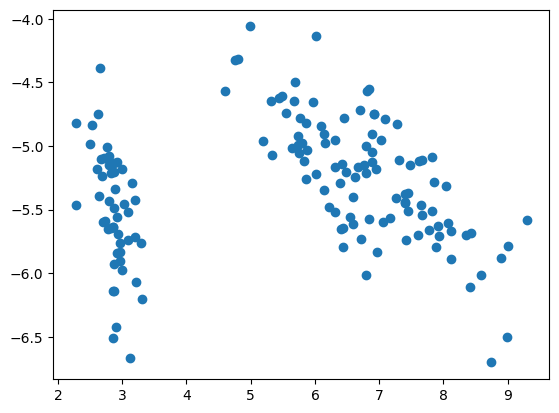

In [150]:
plt.scatter(out[:,0], out[:,1]) # pull out each col/dim/component

## Sklearn

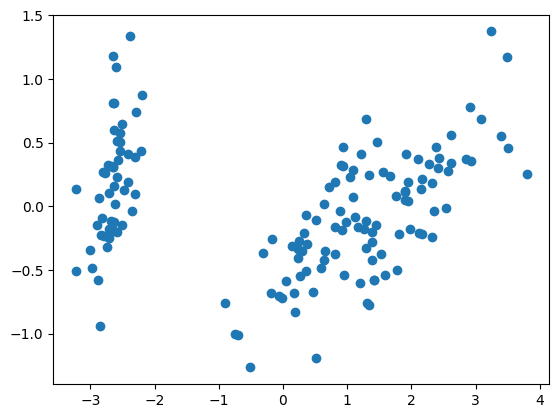

In [122]:
sk_x = PCA(2).fit_transform(X)
plt.scatter(sk_x[:,0], sk_x[:,1])